<a href="https://colab.research.google.com/github/RK22000/ICE-Iris_Classification_Experiment/blob/main/ICE_(Iris_Classification_Experiment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICE
Iris Classification Experiment is my midterm for my ML class.

Lets make this an interesting midterm by having fun with this experiment

## Data loading

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Data exploration

In [5]:
sl, sw, pl, pw = zip(*iris.data)
features = [
    [sl, sw, pl, pw],
    iris.feature_names
]

In [6]:
side = 4

Text(0.5, 0.98, 'Range of feature values')

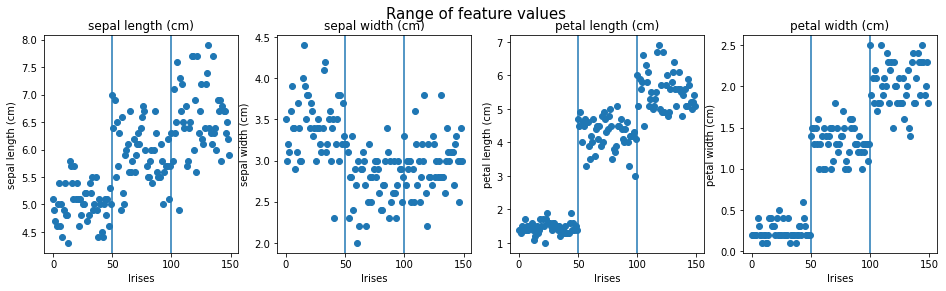

In [7]:
plt.figure(figsize=(side*4, side))
for i, (f, flab) in enumerate(zip(features[0], features[1])):
    plt.subplot(1, 4, i+1)
    plt.scatter(x=range(len(f)), y=f)
    plt.axvline(50)
    plt.axvline(100)
    plt.xlabel("Irises")
    plt.ylabel(flab)
    plt.title(flab)
plt.suptitle("Range of feature values", size=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(0.0, 1.0, 0.0, 1.0)

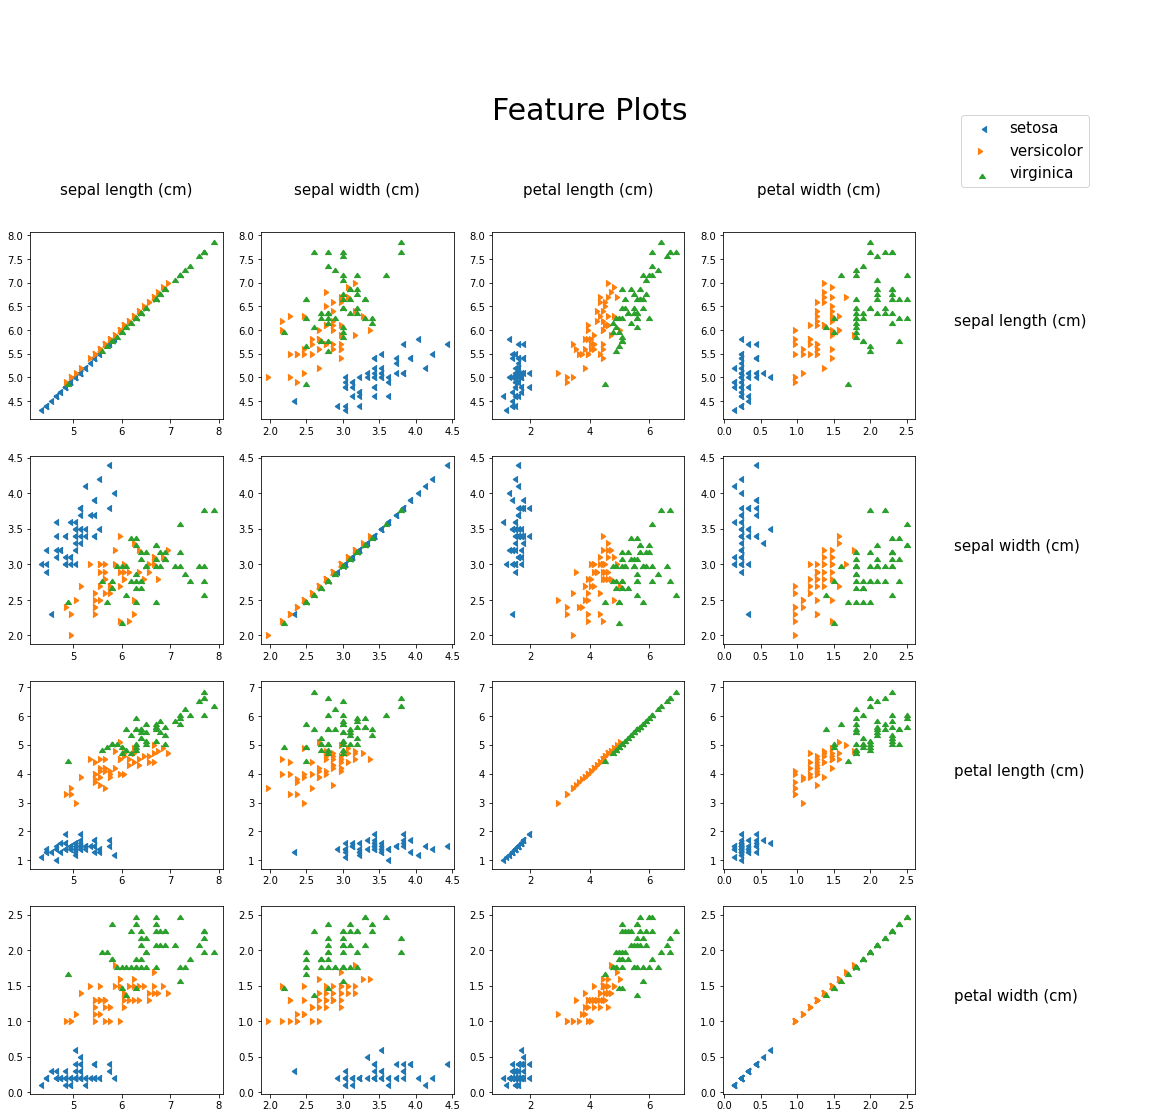

In [8]:
plt.figure(figsize=(5*side, 5*side))
#plt.suptitle("Feature Plots")
textx, texty = 0, 0.5
fontsize=15
for i, (y, ylab) in enumerate(zip(features[0], features[1])):
    plt.subplot(5, 5, 5 + i*5+5) 
    plt.axis("off")
    plt.text(textx, texty, ylab, fontsize=fontsize)
    for j, (x, xlab) in enumerate(zip(features[0], features[1])):
        plt.subplot(5, 5, 5 + i*5 + j+1)
        #plt.axis("off")
        plt.scatter(x=x[:50], y=y[:50], marker=4)
        plt.scatter(x=x[50:100], y=y[50:100], marker=5)
        plt.scatter(x=x[100:], y=y[100:], marker=6)
for i, (y, ylab) in enumerate(zip(features[0], features[1])):
    plt.subplot(5, 5, i+1)
    plt.axis("off")
    plt.text(0.5, 0, ylab, fontsize=fontsize, horizontalalignment='center')
plt.subplot(5, 5, 5)
plt.axis("off")
for i, spc in enumerate(iris.target_names):
    plt.scatter([], [], label=spc, marker=4+i)
plt.legend(loc='lower left', fontsize=fontsize)
plt.subplot(5, 5, 3)
plt.text(0, 0.4, "Feature Plots", fontsize=fontsize*2)
plt.axis("off")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(0.0, 1.0, 0.0, 1.0)

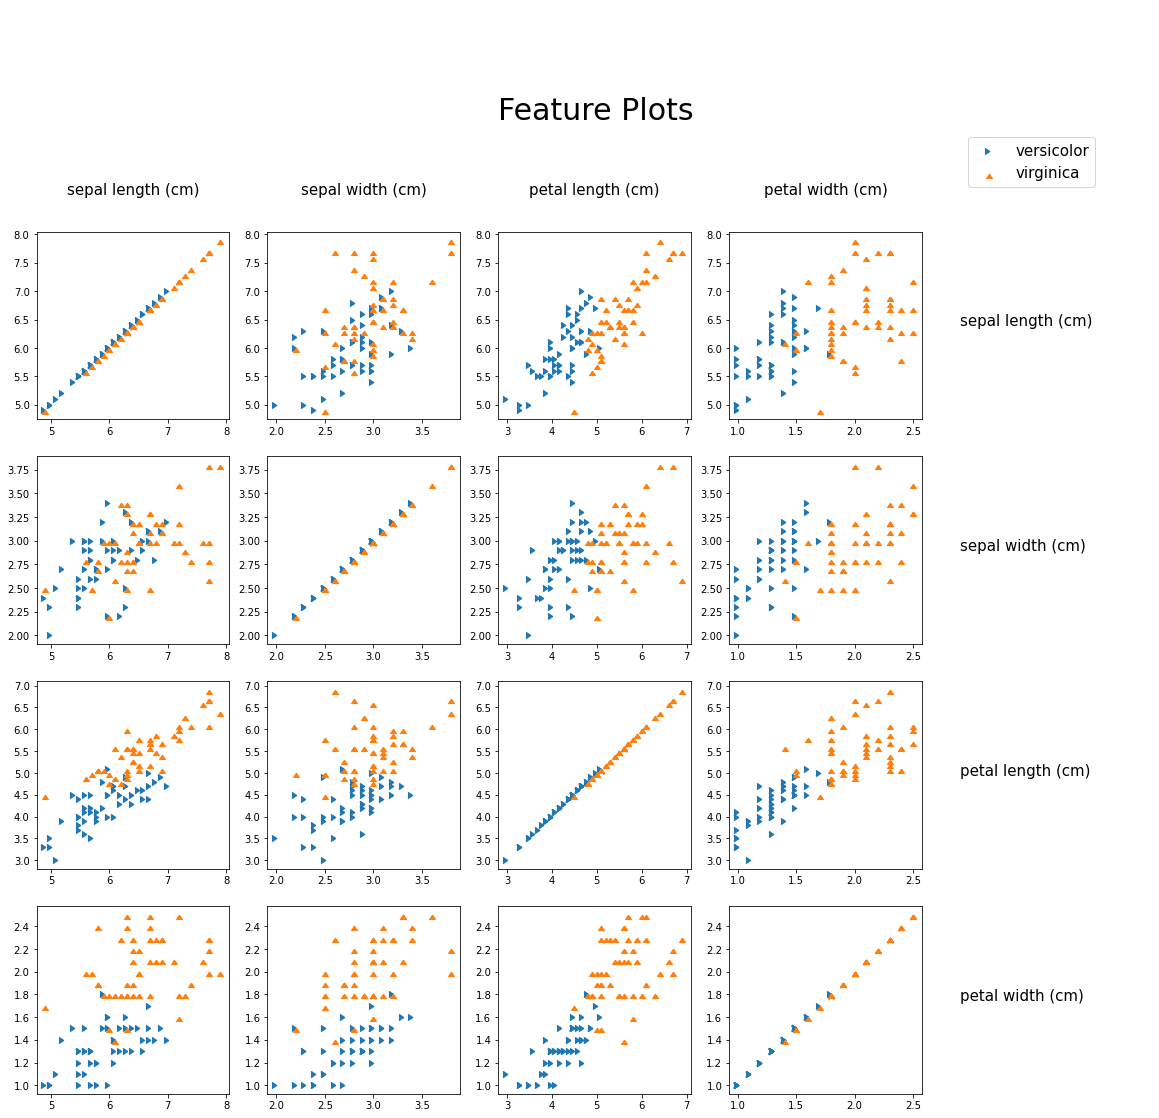

In [9]:
plt.figure(figsize=(5*side, 5*side))
#plt.suptitle("Feature Plots")
textx, texty = 0, 0.5
fontsize=15
for i, (y, ylab) in enumerate(zip(features[0], features[1])):
    plt.subplot(5, 5, 5 + i*5+5) 
    plt.axis("off")
    plt.text(textx, texty, ylab, fontsize=fontsize)
    for j, (x, xlab) in enumerate(zip(features[0], features[1])):
        plt.subplot(5, 5, 5 + i*5 + j+1)
        #plt.axis("off")
        #plt.scatter(x=x[:50], y=y[:50], marker=4)
        plt.scatter(x=x[50:100], y=y[50:100], marker=5)
        plt.scatter(x=x[100:], y=y[100:], marker=6)
for i, (y, ylab) in enumerate(zip(features[0], features[1])):
    plt.subplot(5, 5, i+1)
    plt.axis("off")
    plt.text(0.5, 0, ylab, fontsize=fontsize, horizontalalignment='center')
plt.subplot(5, 5, 5)
plt.axis("off")
for i, spc in enumerate(iris.target_names[1:]):
    plt.scatter([], [], label=spc, marker=5+i)
plt.legend(loc='lower left', fontsize=fontsize)
plt.subplot(5, 5, 3)
plt.text(0, 0.4, "Feature Plots", fontsize=fontsize*2)
plt.axis("off")

## Train Test set 

In [10]:
class Dset:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [65]:
import random
import numpy as np

np.random.seed(42)

train_size = 45 # 90% train data
train, test = Dset([],[]), Dset([],[])
for base in [0, 50, 100]:
    train_idx = set(np.random.choice(50, 45, replace=False))
    for j in range(50):
        i = base+j
        x = iris.data[i]
        y = iris.target[i]
        dset = train if j in train_idx else test
        dset.x.append(x)
        dset.y.append(y)
len(train.x), len(test.x), len(train.y), len(test.y)

(135, 15, 135, 15)

## Classification

### Crude SVC

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = iris.data[50:]
y = iris.target[50:]
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
clf.predict(iris.data[95:105])

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [ ]:
clf.score(iris.data[50:], iris.target[50:])

0.97

### Nearest neighbours

CV 0.96 accuracy with a standard deviation of 0.02
Test accuracy 1.00


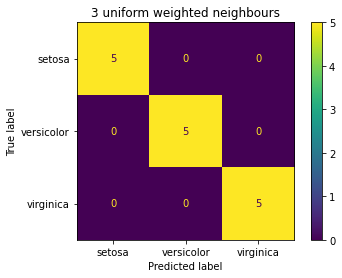

CV 0.96 accuracy with a standard deviation of 0.02
Test accuracy 1.00


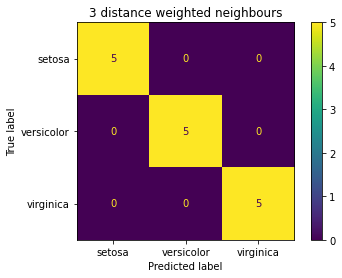

CV 0.97 accuracy with a standard deviation of 0.01
Test accuracy 1.00


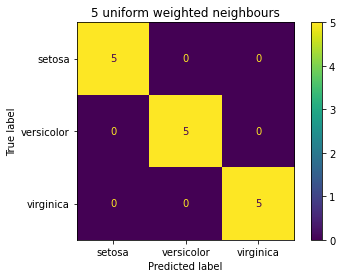

CV 0.97 accuracy with a standard deviation of 0.01
Test accuracy 1.00


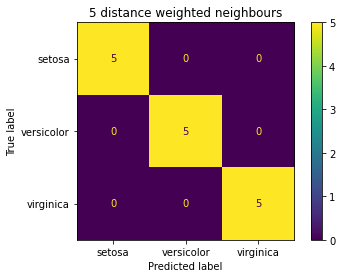

CV 0.96 accuracy with a standard deviation of 0.02
Test accuracy 1.00


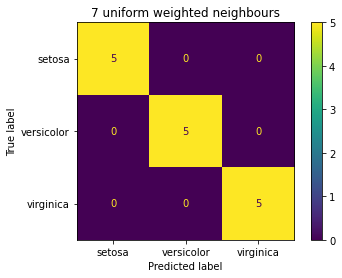

CV 0.98 accuracy with a standard deviation of 0.02
Test accuracy 1.00


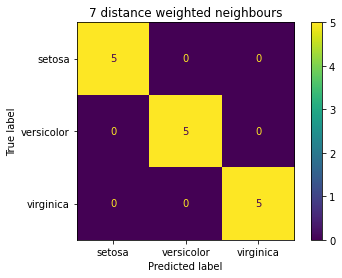

CV 0.96 accuracy with a standard deviation of 0.03
Test accuracy 1.00


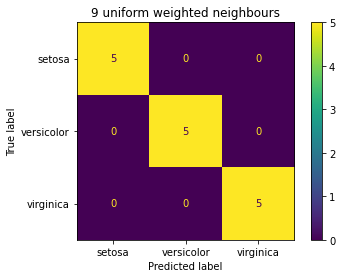

CV 0.97 accuracy with a standard deviation of 0.01
Test accuracy 1.00


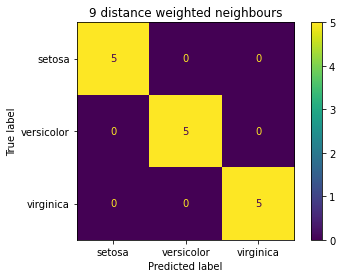

CV 0.97 accuracy with a standard deviation of 0.03
Test accuracy 1.00


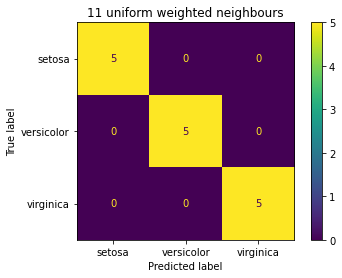

CV 0.98 accuracy with a standard deviation of 0.02
Test accuracy 1.00


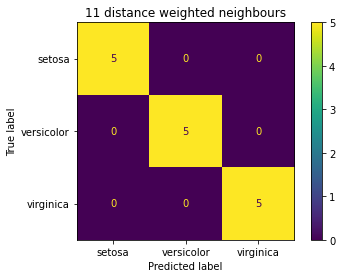

CV 0.96 accuracy with a standard deviation of 0.02
Test accuracy 0.93


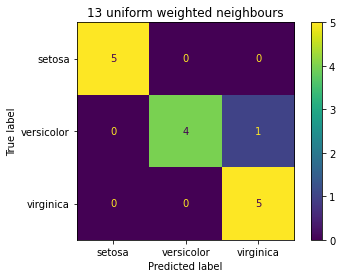

CV 0.97 accuracy with a standard deviation of 0.01
Test accuracy 1.00


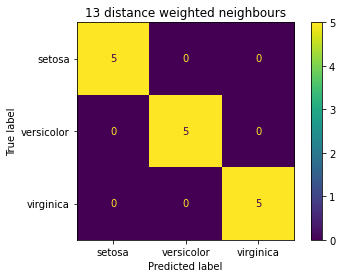

CV 0.96 accuracy with a standard deviation of 0.02
Test accuracy 0.93


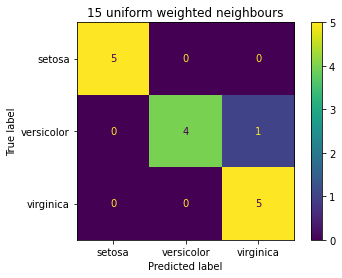

CV 0.97 accuracy with a standard deviation of 0.01
Test accuracy 0.93


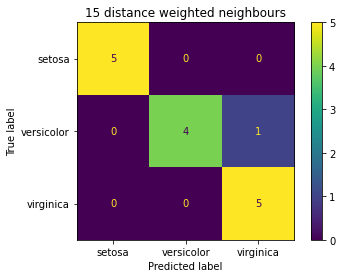

CV 0.96 accuracy with a standard deviation of 0.02
Test accuracy 0.93


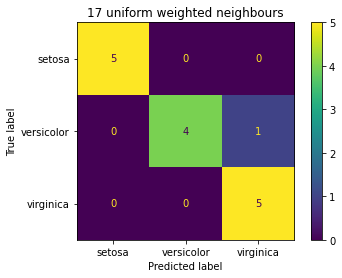

CV 0.97 accuracy with a standard deviation of 0.01
Test accuracy 0.93


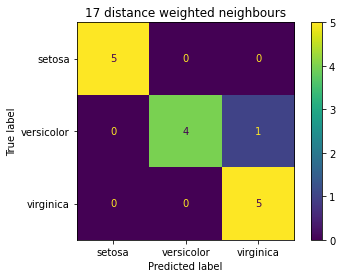

CV 0.98 accuracy with a standard deviation of 0.03
Test accuracy 0.93


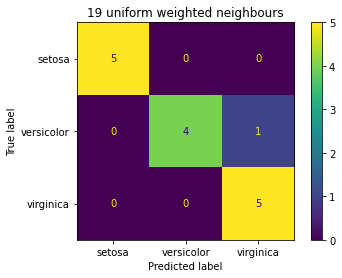

CV 0.98 accuracy with a standard deviation of 0.02
Test accuracy 0.93


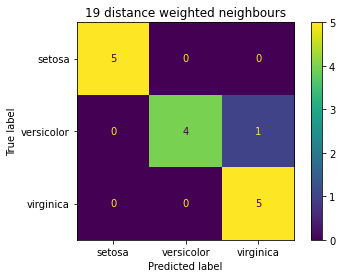

CV 0.96 accuracy with a standard deviation of 0.03
Test accuracy 0.93


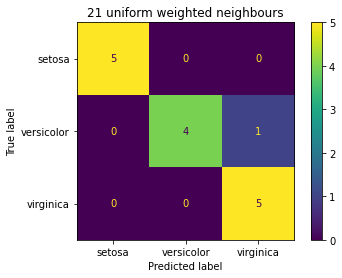

CV 0.97 accuracy with a standard deviation of 0.03
Test accuracy 0.93


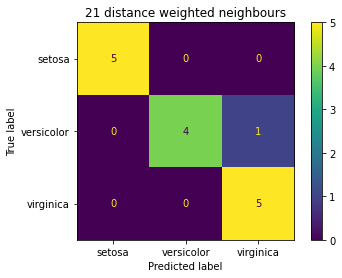

In [100]:
from sklearn import neighbors
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

n_neighbors = [2*i+1 for i in range(1, 11)]
cvUniform, testUniform, cvDist, testDist = [], [], [], []
devUniform, devDist = [], []
for n in n_neighbors:
    for i, w in enumerate(["uniform", "distance"]):
        clf = neighbors.KNeighborsClassifier(n_neighbors=n, weights=w)
        scores = cross_val_score(clf, train.x, train.y, cv=5) # 135 = 3*3*3*5 = 27*5
        clf.fit(train.x, train.y)
        preds = clf.predict(test.x)
        ConfusionMatrixDisplay.from_predictions(
            y_true=test.y,
            y_pred=preds,
            labels=[0, 1, 2],
            display_labels=iris.target_names
        )
        ts_score = clf.score(test.x, test.y)
        #cm = confusion_matrix(y_true=test.y, y_pred=preds, labels=[0, 1, 2])
        #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
        #disp.plot()
        #print(scores)
        cv, dev, ts = (cvUniform, devUniform, testUniform) if i==0 else (cvDist, devDist, testDist)
        cv.append(scores.mean())
        dev.append(scores.std())
        ts.append(ts_score)
        print("CV %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
        print("Test accuracy %0.2f" % ts_score)
        plt.title(f"{n} {w} weighted neighbours")
        plt.show()
None

Text(0.5, 1.0, 'CV and Test accuracies for Uniform and Distance weighted KNN')

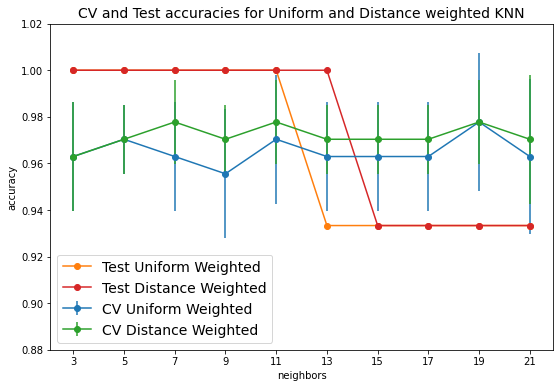

In [111]:
plt.figure(figsize=(9, 6))
for ls, dev, leg in zip(
    [cvUniform, testUniform, cvDist, testDist], 
    [devUniform, [], devDist, []],
    "CV Uniform Weighted, Test Uniform Weighted, CV Distance Weighted, Test Distance Weighted".split(", ")
    ):
    if len(dev) > 0:
        plt.errorbar(n_neighbors, ls, yerr=dev, fmt='o-', label=leg)
    else:
        plt.plot(n_neighbors, ls, 'o-', label=leg)
plt.legend(fontsize=14)
plt.xticks(ticks=n_neighbors)
plt.ylim(0.88, 1.02)
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.title("CV and Test accuracies for Uniform and Distance weighted KNN", fontsize=14)

In [67]:
test.y

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

### Support Vector Classifier